In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# The below is from kaggle as this code was a part of a Kaggle competition which was a Capstone project for a Summer Ananytics course
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
   # for filename in filenames:
       # print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### READING THE TEST AND TRAIN DATA
We have a test and train csv file which contains a list of items sold on E-commerce websites Amazon and Flipkart with total number of ratings on it as well all as the counts on 5,4,3,2,1 star ratings separately.
We not only have the rating but also the number of customer reviews on  a particular product.
Our target variable is the disounted price/ discount offered on the product for which we also have the actual prices of the items with us.
##### We will read in the data to know how it looks like and then go forward with our analysis. Pandas read_csv is a helpful tool for doing so.

In [2]:
#READING THE TEST AND TRAIN DATA
train_data_og=pd.read_csv('train.csv')
test_data_og=pd.read_csv('test.csv')
#test data has no Offer %,price1 column-to be calculated
print(train_data_og.shape)
print(test_data_og.shape)
train_data_og.head() #take a first look at our data.

(15730, 16)
(5244, 14)


,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1


### Splitting the data into -
##### X-the feature matrix and Y-the value to be predicted

In [3]:
#X,y split-at the same time convert Y to numeric values as it is of dtype object
from sklearn.model_selection import train_test_split
train_data=train_data_og.drop(['Offer %','price1','id'],axis=1) #dropping the values to be predicted as well as unique id column

#taking discount % as the target variable as we can calculate discounted price using actual price and offer %.
print(train_data_og['Offer %'].dtype)

#We can also observe that the Offer % is of type object so we will convert it into type float for calculations. 

train_Y=train_data_og['Offer %'].str.replace("%","").astype(float) 
train_X,valid_X,train_y,valid_y=train_test_split(train_data,train_Y,test_size=0.2)
print(train_X.shape,valid_X.shape,train_y.shape,valid_y.shape)

#for EDA
X=pd.concat([train_X,train_y])

object
(12584, 13) (3146, 13) (12584,) (3146,)


Note that we have train data and test data initially, for test data we dont have the values of our target variable(2 columns- offer % and discounted price-price1)
Further we split our train data into training and validation data for checking and improving the accuracy of our model.

## EXPLORATORY DATA ANALYSIS

We will now explore our data further to ,
1) Analyze missing values.
2) Descriptive Statistics of Data.
3) Graph the distibution of various features.
4) Differentiate numerical features from categorical features.

### 1) Analyzing missing values

In [4]:
#Checking for null values in train data
train_data_og.isna().sum()

id              0
title           0
Rating          0
maincateg     526
platform        0
price1          0
actprice1       0
Offer %         0
norating1     678
noreviews1    578
star_5f       588
star_4f       539
star_3f       231
star_2f         0
star_1f         0
fulfilled1      0
dtype: int64

In [5]:
#Extracting columns that contain null values
feature_with_na1=[feature for feature in train_data_og.columns if train_data_og[feature].isnull().sum()>0]
print("Features with NA values in train data : ",feature_with_na1)
feature_with_na2=[feature for feature in test_data_og.columns if test_data_og[feature].isnull().sum()>0]
print("Features with NA values in test data : ",feature_with_na2)

Features with NA values in train data :  ['maincateg', 'norating1', 'noreviews1', 'star_5f', 'star_4f', 'star_3f']
Features with NA values in test data :  ['Rating', 'maincateg', 'star_5f', 'star_1f']


### 2) Descriptive Statistics

In [6]:
#Here are the Descriptive Statistics-
train_X.describe()

,Rating,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
count,12584.000000,12584.000000,12051.000000,12129.000000,12129.000000,12157.000000,12408.000000,12584.000000,12584.000000,12584.000000
mean,4.014089,1376.063017,3050.921417,419.709044,1584.985737,648.385868,358.392489,155.364431,276.389145,0.603385
std,0.300477,1244.797247,11879.551346,1737.037604,6211.544128,2803.675424,1411.727012,557.062287,960.017649,0.489214
min,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.900000,699.000000,63.000000,9.000000,30.000000,12.000000,7.000000,3.000000,6.000000,0.000000
50%,4.000000,999.000000,301.000000,42.000000,150.000000,59.000000,33.000000,17.000000,30.000000,1.000000
75%,4.200000,1299.000000,1544.000000,215.000000,789.000000,299.000000,172.000000,77.000000,141.000000,1.000000
max,5.000000,13499.000000,289973.000000,45448.000000,151193.000000,74037.000000,34978.000000,11705.000000,18060.000000,1.000000


##### Observe that mean value for the features is much greater than the median, suggesting that their distribution might be positively skewed.

### 3) Plotting Distributions

<AxesSubplot:xlabel='star_1f', ylabel='Density'>

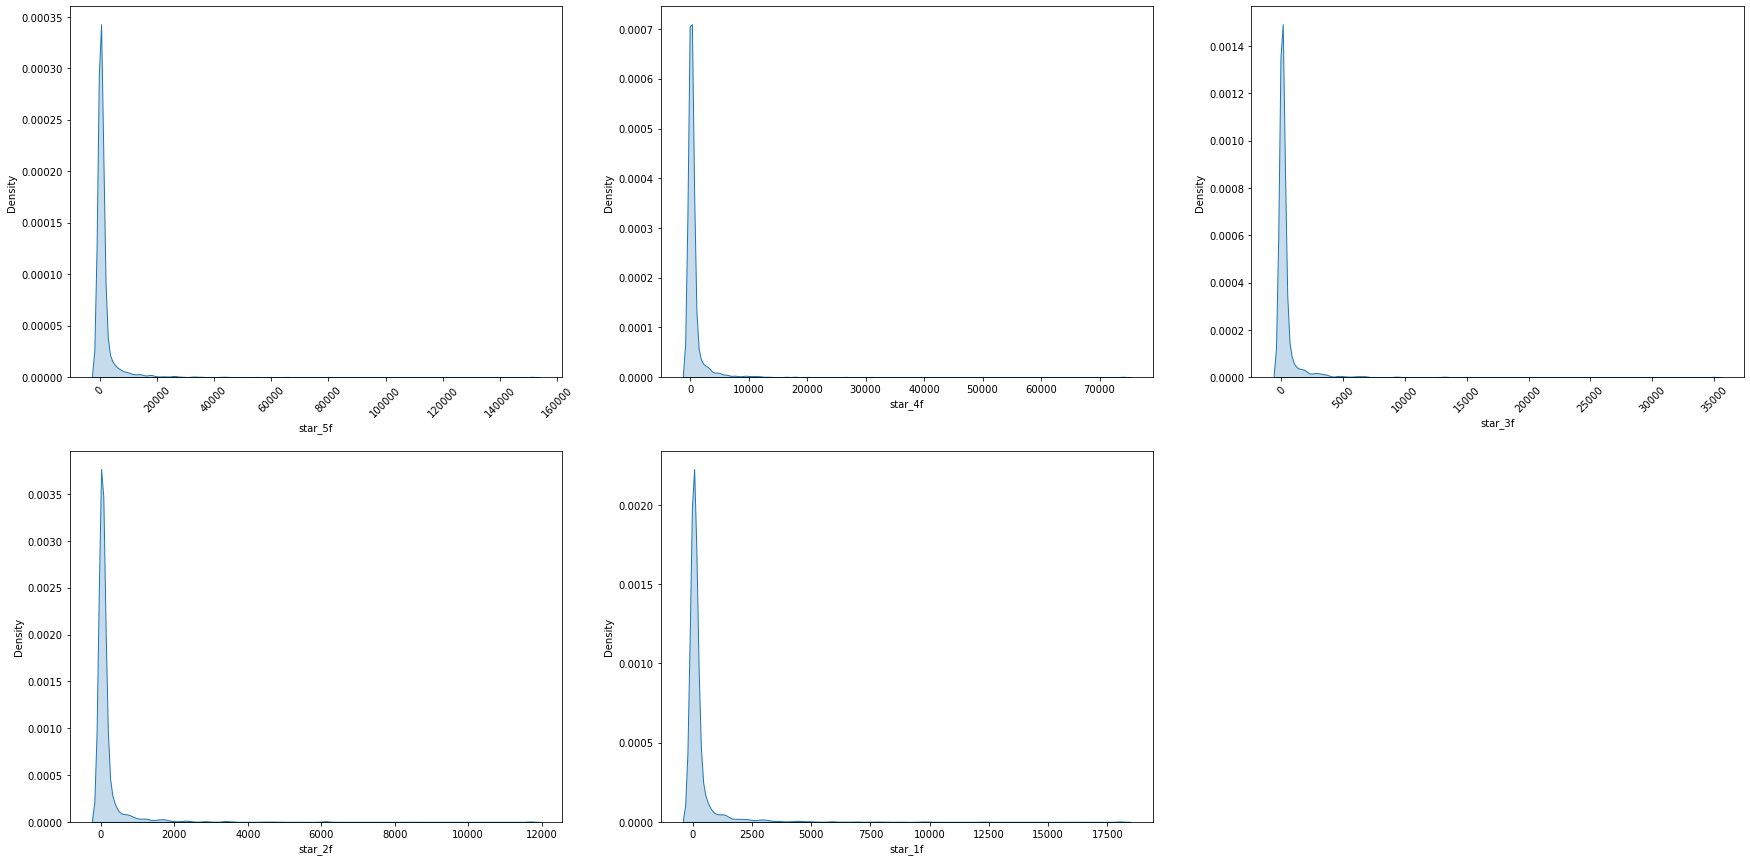

In [7]:
#A graphical display of how some of the features are distributed
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,15))
plt.subplot(2,3,1)
plt.xticks(rotation=45)
sns.kdeplot(train_data_og.star_5f,shade=True)
plt.subplot(2,3,2)
sns.kdeplot(train_data_og.star_4f,shade=True)
plt.subplot(2,3,3)
sns.kdeplot(train_data_og.star_3f,shade=True)
plt.xticks(rotation=45)
plt.subplot(2,3,4)
sns.kdeplot(train_data_og.star_2f,shade=True)
plt.subplot(2,3,5)
sns.kdeplot(train_data_og.star_1f,shade=True)


 IMPORTANT OBSERVATION-ALL DISTRIBUTIONS ARE POSITIVELY SKEWED-which also means that the mean value of these distributions is a little less reliable central tendency for imputing.

### 4) Numerical and Categorical Features

In [8]:
#numerical and categorical columns with low cardinality.
categorical_cols = [cname for cname in train_X.columns if train_X[cname].nunique() < 10 and 
                        train_X[cname].dtype == "object"]
numerical_cols = [cname for cname in train_X.columns if train_X[cname].dtype in ['int64', 'float64']]
print("Categorical Features-",categorical_cols)
print("Numerical Features-",numerical_cols)

Categorical Features- ['maincateg', 'platform']
Numerical Features- ['Rating', 'actprice1', 'norating1', 'noreviews1', 'star_5f', 'star_4f', 'star_3f', 'star_2f', 'star_1f', 'fulfilled1']


<AxesSubplot:xlabel='maincateg', ylabel='Offer %'>

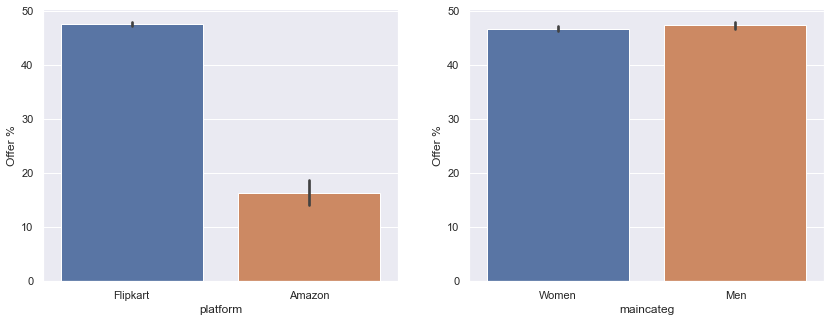

In [9]:
#Comparing the offer in Amazon and Flipkart
sns.set()
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.barplot(x=train_X.platform,y=train_y)
plt.subplot(1,2,2)
sns.barplot(x=train_X.maincateg,y=train_y)

We observe that Flipkart has higher discount rates as compared to Amazon.

### PREPROCESSING OF DATA

##### It is easy observation that the categories column can be filled in with values based off the titles column as it easily contians the keywords, 'men' and 'women' in it.

In [10]:
#define a nan value filler based on keyword present in titles. PREPROCESSING FOR CATEGORICAL DATA
def categoryFill(data):
  df=data.copy()
  Titles=df.title.str.lower()[data.maincateg.isnull()]  ## extracting Titles for which maincateg is null
  for index,name in Titles.items():
      if 'men'in name:
        df.loc[index,'maincateg']='Men'
      else:
        df.loc[index,'maincateg']='Women'       
  return df 

In [11]:
#Filling in the maincateg values on train and validation data
train_X=categoryFill(train_X)
valid_X=categoryFill(valid_X)
valid_X.isna().sum(), train_X.isna().sum()

(title           0
 Rating          0
 maincateg       0
 platform        0
 actprice1       0
 norating1     145
 noreviews1    123
 star_5f       133
 star_4f       112
 star_3f        55
 star_2f         0
 star_1f         0
 fulfilled1      0
 dtype: int64,
 title           0
 Rating          0
 maincateg       0
 platform        0
 actprice1       0
 norating1     533
 noreviews1    455
 star_5f       455
 star_4f       427
 star_3f       176
 star_2f         0
 star_1f         0
 fulfilled1      0
 dtype: int64)

#### Let us define a column transformer for our data, that One Hot encodes the categorical columns and imputes the numerical values.

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
numerical_transformer = KNNImputer(n_neighbors=4)
categorical_transformer=OneHotEncoder(handle_unknown='ignore')
from sklearn.compose import ColumnTransformer
preprocessor=ColumnTransformer(transformers=[('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])
    #since this preprocessing will remove the column names, we might as well put them together
cols=numerical_cols+['Men','Women','Amazon','Flipkart']
cols

['Rating',
 'actprice1',
 'norating1',
 'noreviews1',
 'star_5f',
 'star_4f',
 'star_3f',
 'star_2f',
 'star_1f',
 'fulfilled1',
 'Men',
 'Women',
 'Amazon',
 'Flipkart']

In [13]:
new_train_X=pd.DataFrame(preprocessor.fit_transform(train_X),columns=cols)
new_valid_X=pd.DataFrame(preprocessor.transform(valid_X),columns=cols)
#print(new_train_X.shape,new_valid_X.shape)
new_train_X


,Rating,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,Men,Women,Amazon,Flipkart
0,4.0,999.0,301.0,48.0,165.0,52.0,51.0,17.0,24.0,0.0,0.0,1.0,0.0,1.0
1,3.3,999.0,6.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2,4.2,949.0,3223.0,474.0,1738.0,875.0,324.0,107.0,179.0,1.0,0.0,1.0,0.0,1.0
3,4.4,5095.0,211.0,34.0,132.0,48.0,16.0,7.0,8.0,0.0,0.0,1.0,0.0,1.0
4,3.7,2883.0,508.0,93.0,223.0,58.0,37.0,35.0,83.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12579,3.7,1597.0,79.0,40.0,15.0,11.0,10.0,20.0,44.0,1.0,1.0,0.0,1.0,0.0
12580,4.3,999.0,17117.0,2296.0,9662.0,5025.0,1421.0,366.0,643.0,1.0,0.0,1.0,0.0,1.0
12581,4.1,3495.0,1170.0,161.0,623.0,284.0,118.0,54.0,91.0,1.0,1.0,0.0,0.0,1.0
12582,4.2,999.0,237.0,26.0,128.0,58.0,30.0,10.0,11.0,1.0,1.0,0.0,0.0,1.0


In [14]:
new_train_X.isna().sum()

Rating        0
actprice1     0
norating1     0
noreviews1    0
star_5f       0
star_4f       0
star_3f       0
star_2f       0
star_1f       0
fulfilled1    0
Men           0
Women         0
Amazon        0
Flipkart      0
dtype: int64

Now we have performed Imputations on numerical columns and encoded our categorical columns, lets look at other columns and preprocess them too.
Firstly, we know that norating is sum of all ratings(5,4,3,2,1). Lets us check if that is true here.



In [15]:
difference=new_train_X.norating1-(new_train_X.star_1f+new_train_X.star_2f+new_train_X.star_3f+new_train_X.star_4f+new_train_X.star_5f)
difference[difference!=0]

0         -8.0
4         72.0
10         2.0
13       -74.0
14      -416.0
         ...  
12568     -3.0
12569     -4.0
12577      1.0
12578      1.0
12579    -21.0
Length: 2888, dtype: float64

There are 2908 records where these values dont add up, let us fix that.


In [16]:
def starFill(data):
    df=data.copy()
    difference= df.norating1-(df.star_5f+df.star_4f+df.star_3f+df.star_2f+df.star_1f) 
    for index,item in difference.items():
        if item != 0:
            df.loc[index,'norating1']=df.loc[index,'star_5f']+df.loc[index,'star_4f']+df.loc[index,'star_3f']+df.loc[index,'star_2f']+df.loc[index,'star_1f']
    return df


In [17]:
new_train_X=starFill(new_train_X)
new_valid_X=starFill(new_valid_X)
new_train_X.isna().sum()

Rating        0
actprice1     0
norating1     0
noreviews1    0
star_5f       0
star_4f       0
star_3f       0
star_2f       0
star_1f       0
fulfilled1    0
Men           0
Women         0
Amazon        0
Flipkart      0
dtype: int64

Building our ML model, if you are wondering about the parameters they were tuned using GridSearchCV

In [18]:
#from sklearn.model_selection import GridSearchCV
#params={'n_estimators':list(range(100,600,1000,1500)),'learning_rate':[0.01,0.02,0.03,0.04,0.05,0.1,0.2]}
#reg=GridSearchCV(model,scoring='r2',cv=5,param_grid=params)

In [34]:
from xgboost import XGBRegressor
model=XGBRegressor(n_estimators=1500,learning_rate=0.2,random_state=0)
model.fit(new_train_X,train_y)
pred=model.predict(new_valid_X)

Checking Model Accuracy

In [35]:
#lets check our score on validation data
from sklearn.metrics import mean_absolute_error,mean_squared_error
price1=valid_X.actprice1-(pred/100)*valid_X.actprice1
score=mean_absolute_error(valid_y,pred)
score2=mean_squared_error(valid_y,pred)
print('Mean Absolute Error:',score,',   Mean Squared Error:',score2)

Mean Absolute Error: 5.635992452556904 ,   Mean Squared Error: 103.16036134845737


In [36]:
model.score(new_valid_X,valid_y)

0.7211932337597406